# Fig. 5.3 Feature Selection for IntruDTree

In [1]:
from common import get_modifications
from common import rename_feature
from common import Identifier
import matplotlib.pyplot as plt
import pickle

In [2]:
selection = {"ext":11, "int":11, "red":7, "rex":9}

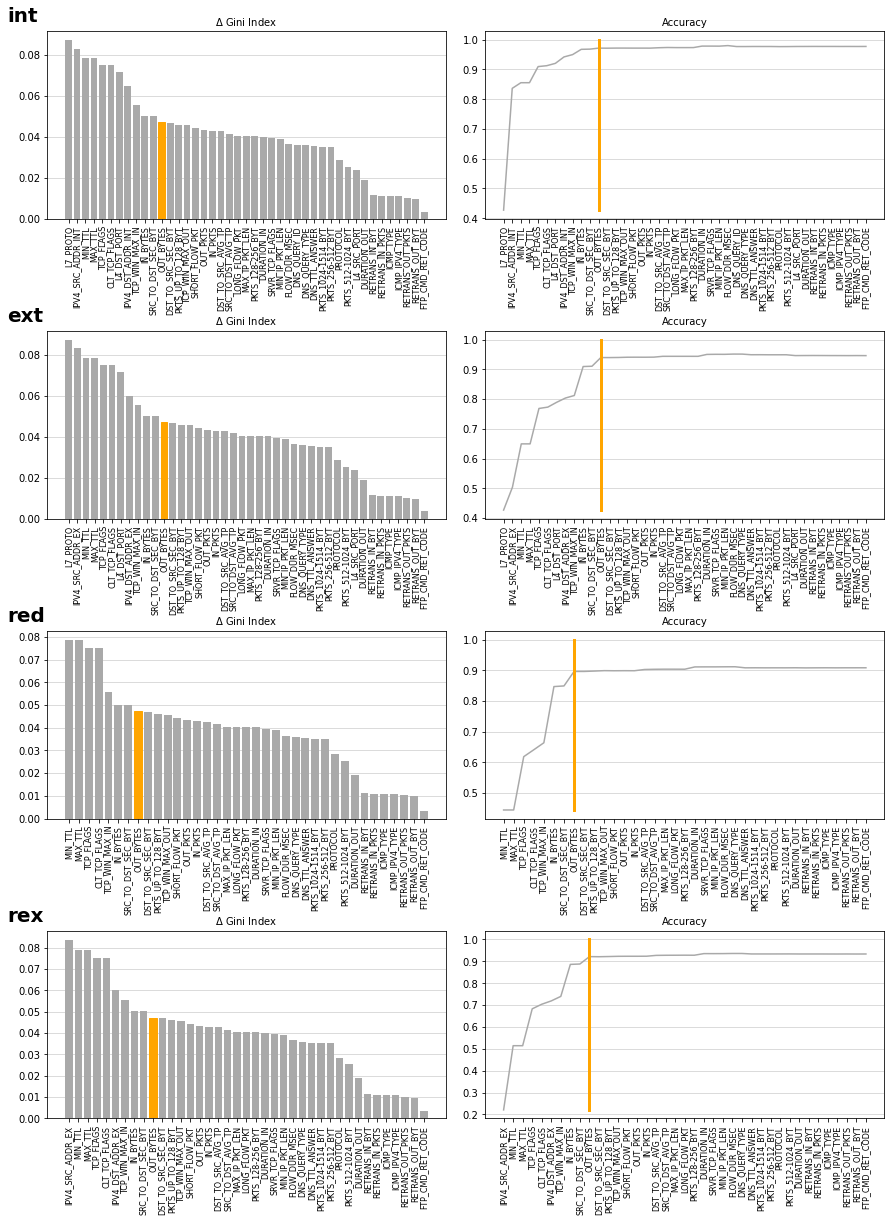

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharey=False)

for i, mod in enumerate(get_modifications()):
    id_ = Identifier()
    id_.title = "netflow_sample"
    id_.name = "idtree"
    id_.mod = mod


    with open(f"../search/rank_{id_.as_file()}.pkl", "rb") as file:
        result = pickle.load(file)

    xs = result.index
    deltas = result["Delta"]
    scores = result["Score"]
    plot_labels = [rename_feature(x) for x in result["Feature"]]


    a = axes[i][0]
    a.set_title("$\Delta$ Gini Index", fontsize=10)
    barlist = a.bar(xs, deltas, zorder=3, color="darkgrey")
    barlist[selection[mod]].set_color('orange')
    a.set_xticks(xs, plot_labels, rotation='vertical')
    a.xaxis.set_tick_params(labelsize=8)
    a.grid(color='lightgray', axis="y", zorder=0)
    a.text(-0.1, 1.05, mod, transform=a.transAxes, size=20, weight='bold')

    a = axes[i][1]
    a.set_title("Accuracy", fontsize=10)
    a.plot(xs, scores, color="darkgrey")
    a.plot([selection[mod]]*2,[min(scores),1], zorder=3, color="orange", linewidth=3)
    a.set_xticks(xs, plot_labels, rotation='vertical')
    a.xaxis.set_tick_params(labelsize=8)
    a.grid(color='lightgray', axis="y", zorder=0)


plt.subplots_adjust(wspace=0.1, hspace=0.6)
plt.savefig('../img/idtree_selection.png', bbox_inches='tight')